In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [2]:
adult_data=pd.read_csv("processed_data.csv")

In [3]:
# Copy all the predictor variables into X dataframe
x = adult_data.drop('salary', axis=1)

# Copy target into the y dataframe. 
y = adult_data[['salary']]

In [4]:
# Split X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20 , random_state=1)

In [5]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

D:\PGDM\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

### Predicting on Training and Test dataset

In [6]:
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)
expected=y_test

In [7]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
expected

,salary
12576,0
11846,1
9399,0
32130,0
19716,1
...,...
26875,0
9202,1
22414,1
25493,0


In [9]:
ytest_predict=model.predict(x_test)
pd.DataFrame(ytest_predict).head(20)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### Getting the Predicted Classes and Probs

In [10]:
ytest_predict_prob=model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.704020,0.295980
1,0.850847,0.149153
2,0.892731,0.107269
3,0.708873,0.291127
4,0.677945,0.322055


### Model Evaluation

In [11]:
### Model Evaluation
model.score(x_train, y_train)

0.7562334319412962

### AUC and ROC for the training data

AUC: 0.506


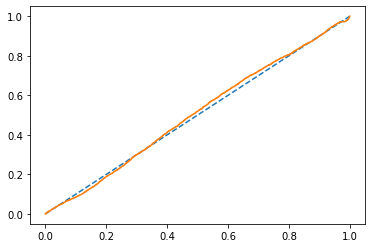

In [13]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [14]:
# Accuracy - Test Data
model.score(x_test, y_test)

0.7704363859864782

### AUC and ROC for the test data

AUC: 0.506


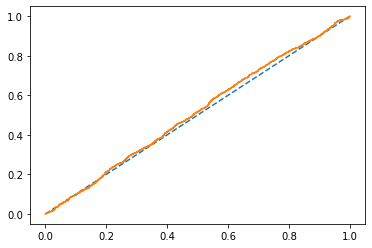

In [15]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### Confusion Matrix for the training data

In [16]:
confusion_matrix(y_train, ytrain_predict)

array([[19684,     0],
       [ 6345,     0]], dtype=int64)

In [17]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     19684
           1       0.00      0.00      0.00      6345

    accuracy                           0.76     26029
   macro avg       0.38      0.50      0.43     26029
weighted avg       0.57      0.76      0.65     26029



D:\PGDM\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\PGDM\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\PGDM\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix for test data

In [18]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[5014,    0],
       [1494,    0]], dtype=int64)

In [19]:
#Test Data Accuracy
test_acc=model.score(x_test,y_test)
test_acc

0.7704363859864782

In [20]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5014
           1       0.00      0.00      0.00      1494

    accuracy                           0.77      6508
   macro avg       0.39      0.50      0.44      6508
weighted avg       0.59      0.77      0.67      6508



D:\PGDM\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\PGDM\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\PGDM\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

D:\PGDM\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\PGDM\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\PGDM\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\PGDM\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\PGDM\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('T

In [22]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.805397 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


### Model Evaluation after model tuning

In [24]:
# Accuracy - Train Data
grid_result.score(x_train, y_train)

0.8057935379768719

### AUC and ROC for the training data

AUC: 0.830


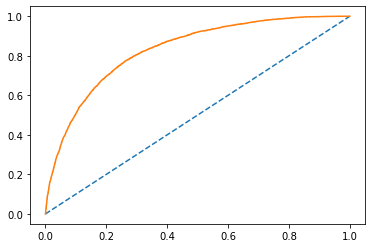

In [27]:
# predict probabilities
probs = grid_result.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [25]:
# Accuracy - Test Data
grid_result.score(x_test, y_test)

0.8102335586969883

### AUC and ROC for the testing data

AUC: 0.830


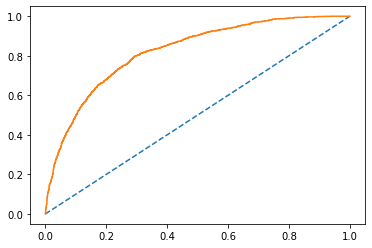

In [28]:
# predict probabilities
probs = grid_result.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [35]:
ytrain_predict_tuning=grid_result.predict(x_train)
ytest_predict_tuning=grid_result.predict(x_test)
# pd.DataFrame(ytest_predict_prob).head()

### Confusion Matrix for the training data

In [32]:
confusion_matrix(y_train, ytrain_predict_tuning)

array([[18337,  1347],
       [ 3708,  2637]], dtype=int64)

In [33]:
print(classification_report(y_train, ytrain_predict_tuning))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     19684
           1       0.66      0.42      0.51      6345

    accuracy                           0.81     26029
   macro avg       0.75      0.67      0.69     26029
weighted avg       0.79      0.81      0.79     26029



### Confusion Matrix for test data

In [36]:
cnf_matrix=confusion_matrix(y_test, ytest_predict_tuning)
cnf_matrix

array([[4638,  376],
       [ 859,  635]], dtype=int64)

In [38]:
print(classification_report(y_test, ytest_predict_tuning))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5014
           1       0.63      0.43      0.51      1494

    accuracy                           0.81      6508
   macro avg       0.74      0.68      0.69      6508
weighted avg       0.79      0.81      0.80      6508



In [39]:
import pickle

In [40]:
# save the model to disk
pickle_out = open("salary.pickle","wb")
pickle.dump(grid_result, pickle_out)
loaded_model = pickle.load(open("salary.pickle", "rb")) 
result = loaded_model.score(x_test, y_test) 
print(result)

0.8102335586969883
